# Exploring AVIRIS-NG Instrument Data Demonstration from the ABoVE NASA Terrestrial Ecology Program Field Campaign

*Author:  ORNL DAAC*
<br>
*Date: August 14, 2022*
<br>
*Contact for [ORNL DAAC](https://daac.ornl.gov/):  uso@daac.ornl.gov*

##### Keywords:  ORNL DAAC, AVIRIS-NG, ABoVE, Python

# Tutorial Overview

This tutorial seeks to provide methods approximating those used in a study of Wetland Vegetation Classification conducted by NASA's Arctic-Boreal Vulnerability Experiment (ABoVE) Science team.  The study incorporated data from NASA airborne instruments including the AVIRIS-NG instrument. AVIRIS-NG (Airborne Visible/Infrared Imaging Spectrometer-Next Generation) provides continuous radiance measurements of surface reflectance.  The study included applications associating spectral characteristics with land cover classification focused on water and wetland vegetation communities over the Peace-Athabasca Delta, Canada.

In this tutorial, we'll use python methods to:
1. read and explore a flight path of Spectral Reflectance (L2) data from the AVIRIS-NG Instrument
2. explore Spectral Profiles of the imaging spectroscopy data
3. export a georeferenced multiband geoTIFF file
4. run a Principal Components Analysis (PCA) of the AVIRIS-NG Spectral Reflectance file

   

### ABoVE Campaign Description

**ABoVE** The Arctic-Boreal Vulnerability Experiment (ABoVE) is a NASA Terrestrial Ecology Program field campaign being conducted in Alaska and western Canada, for 8 to 10 years, starting in 2015. Research for ABoVE links field-based, process-level studies with geospatial data products derived from airborne and satellite sensors, providing a foundation for improving the analysis, and modeling capabilities needed to understand and predict ecosystem responses to, and societal implications of, climate change in the Arctic and Boreal regions.

## Datasets:  
### ABoVE: Wetland Vegetation Classification for Peace-Athabasca Delta, Canada, 2019

**Citation:**  Wang, C., T.M. Pavelsky, E.D. Kyzivat, F. Garcia-Tigreros, F. Yao, X. Yang, S. Zhang, C. Song, T. Langhorst, W. Dolan, M. Kurek, M.E. Harlan, L.C. Smith, D. Butman, R.G.M. Spencer, C.J. Gleason, and D.L. Peters. 2022. ABoVE: Wetland Vegetation Classification for Peace-Athabasca Delta, Canada, 2019. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2069

### AVIRIS-NG Surace Reflectance (L2) Data

AVIRIS-NG Surface Reflectance Flight Line used in this demonstration: https://avng.jpl.nasa.gov/avng/y19_data/ang20190716t180912rfl.tar.gz

![title](images/Wetland_VegClassification_PAD_Fig1.jpg)  <h5><center>Wetland vegetation community classification for the Peace-Athabasca Delta, Alberta, Canada created from AVIRIS-NG derived features</center></h5>


The *Peace–Athabasca Delta*, located in northeast Alberta, is the largest freshwater inland river delta in North America. It is located partially within the southeast corner of Wood Buffalo National Park, Canada's largest national park, and also spreads into the Regional Municipality of Wood Buffalo. The delta encompasses approximately 321,200 ha (794,000 acres), formed where the Peace and Athabasca rivers converge on the Slave River and Lake Athabasca. The delta region is designated a wetland of international importance and a UNESCO World Heritage Site. The region is large enough that it is considered one of twenty distinct natural subregions of Alberta by the provincial government's Natural Regions Committee.  Source:  https://en.wikipedia.org/wiki/Peace%E2%80%93Athabasca_Delta




##### Peace–Athabasca Delta AVIRIS-NG Flight Lines

![title](images/Flightlines_2019_PAD.png)  <h5><center>AVIRIS-NG Flight Lines within the PAD</center></h5>

#### Insert landing page(s) for data/flight line access/download

## Part 1: Explore an AVIRIS-NG Flight Line from the PAD ABoVE Area

In [2]:
import gdal
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#set working directories and file location of flight path
#file_dir = ('AVIRIS-NG_L2_files/ang20190715t174825_corr_v2v2_img')

Open the file as a GDAL raster dataset.

In [4]:
#image_open = gdal.Open('JPL_files/ang20190715t185057_rfl_v2v2_img')
image_open = gdal.Open('JPL_files/ang20190716t180912_rfl_v2v2_img')
print(image_open)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000020C7F006DB0> >


In [5]:
nbands = image_open.RasterCount
nrows = image_open.RasterYSize
ncols = image_open.RasterXSize

print("\n".join(["Bands:\t"+str(nbands), "Rows:\t"+str(nrows), "Cols:\t"+str(ncols)]))

Bands:	425
Rows:	3828
Cols:	650


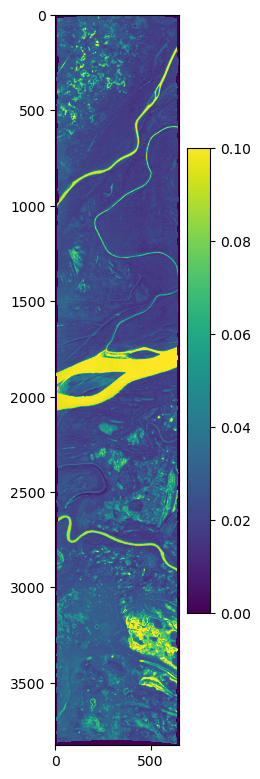

In [6]:
img_red = image_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = image_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = image_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [2,15]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=0.1)
#plt.imshow(img_green, vmin=0, vmax=0.1)
#plt.imshow(img_blue, vmin=0, vmax=0.1)
plt.colorbar()
plt.show()

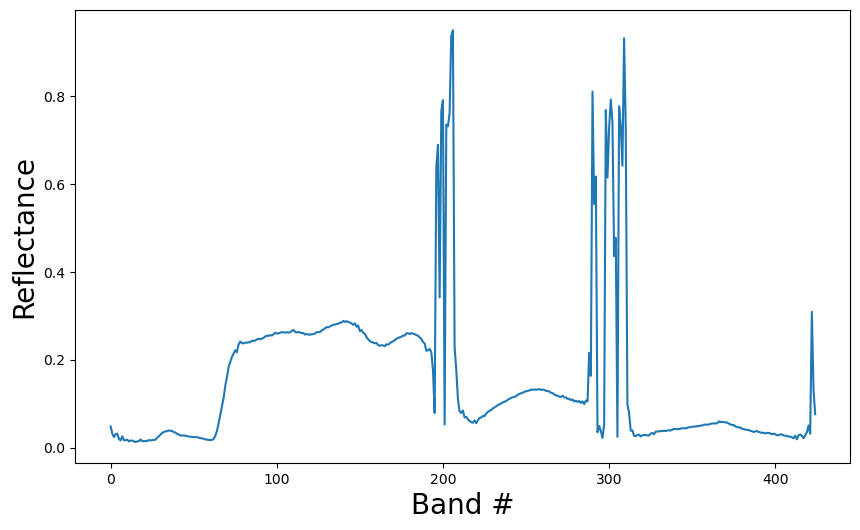

In [8]:
# Load a single pixel and plot its reflectance spectrum
pixell = image_open.ReadAsArray(450, 1200, 1, 1)
pixell = np.reshape(pixell, (425))
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(pixell)
plt.xlabel('Band #', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()


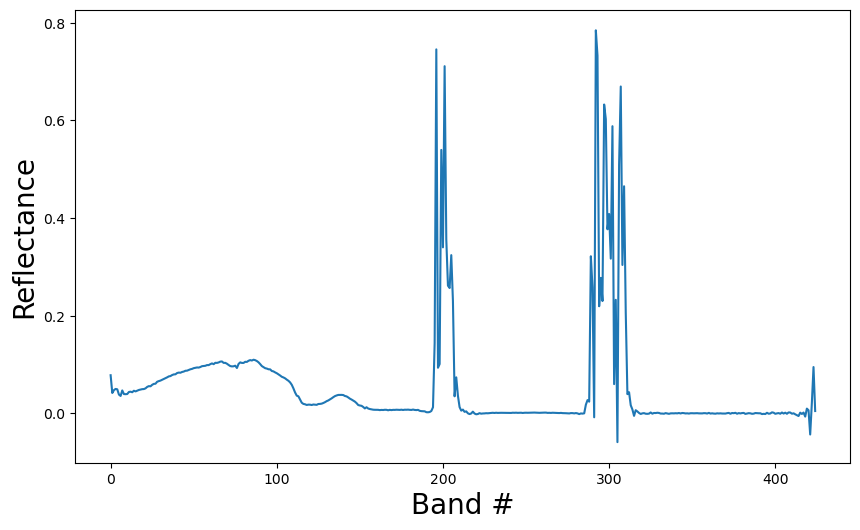

In [9]:
# Load a single pixel and plot its reflectance spectrum
pixelw = image_open.ReadAsArray(50, 2020, 1, 1)
pixelw = np.reshape(pixelw, (425))
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(pixelw)
plt.xlabel('Band #', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

### Remove the noise of the Atmospheric Windows

In [10]:
# Define the wavelengths and bad bands list
wavelengths = [377.071821 , 382.081821 , 387.091821 , 392.10182100000003 , 397.10182100000003 , 402.11182099999996 , 407.121821 , 412.131821 , 417.14182100000005 , 422.151821 , 427.161821 , 432.171821 , 437.171821 , 442.18182099999996 , 447.191821 , 452.201821 , 457.21182100000004 , 462.221821 , 467.23182099999997 , 472.23182099999997 , 477.241821 , 482.251821 , 487.261821 , 492.271821 , 497.28182100000004 , 502.291821 , 507.30182099999996 , 512.301821 , 517.3118209999999 , 522.321821 , 527.331821 , 532.3418210000001 , 537.351821 , 542.361821 , 547.361821 , 552.3718210000001 , 557.381821 , 562.3918209999999 , 567.401821 , 572.411821 , 577.4218209999999 , 582.431821 , 587.431821 , 592.441821 , 597.451821 , 602.461821 , 607.471821 , 612.4818210000001 , 617.491821 , 622.491821 , 627.501821 , 632.511821 , 637.521821 , 642.5318209999999 , 647.541821 , 652.551821 , 657.561821 , 662.561821 , 667.571821 , 672.581821 , 677.591821 , 682.601821 , 687.611821 , 692.6218210000001 , 697.6218210000001 , 702.631821 , 707.6418209999999 , 712.651821 , 717.661821 , 722.671821 , 727.681821 , 732.691821 , 737.691821 , 742.701821 , 747.711821 , 752.721821 , 757.7318210000001 , 762.741821 , 767.751821 , 772.751821 , 777.761821 , 782.7718209999999 , 787.781821 , 792.791821 , 797.801821 , 802.811821 , 807.821821 , 812.821821 , 817.831821 , 822.841821 , 827.851821 , 832.861821 , 837.8718210000001 , 842.881821 , 847.881821 , 852.891821 , 857.901821 , 862.9118209999999 , 867.921821 , 872.931821 , 877.941821 , 882.951821 , 887.951821 , 892.961821 , 897.971821 , 902.981821 , 907.991821 , 913.0018210000001 , 918.011821 , 923.0218209999999 , 928.0218209999999 , 933.031821 , 938.041821 , 943.0518209999999 , 948.061821 , 953.071821 , 958.081821 , 963.081821 , 968.091821 , 973.101821 , 978.1118210000001 , 983.121821 , 988.131821 , 993.141821 , 998.151821 , 1003.1518210000002 , 1008.161821 , 1013.171821 , 1018.181821 , 1023.1918209999999 , 1028.2018209999999 , 1033.211821 , 1038.2118209999999 , 1043.2218209999999 , 1048.2318209999999 , 1053.241821 , 1058.251821 , 1063.261821 , 1068.271821 , 1073.2818209999998 , 1078.281821 , 1083.291821 , 1088.301821 , 1093.311821 , 1098.321821 , 1103.331821 , 1108.341821 , 1113.341821 , 1118.351821 , 1123.361821 , 1128.371821 , 1133.381821 , 1138.391821 , 1143.4018210000002 , 1148.4118210000001 , 1153.411821 , 1158.421821 , 1163.4318210000001 , 1168.4418210000001 , 1173.451821 , 1178.4618209999999 , 1183.4718209999999 , 1188.471821 , 1193.481821 , 1198.4918209999998 , 1203.5018209999998 , 1208.511821 , 1213.521821 , 1218.531821 , 1223.541821 , 1228.541821 , 1233.551821 , 1238.561821 , 1243.571821 , 1248.581821 , 1253.5918210000002 , 1258.601821 , 1263.601821 , 1268.611821 , 1273.6218210000002 , 1278.631821 , 1283.641821 , 1288.651821 , 1293.661821 , 1298.671821 , 1303.671821 , 1308.681821 , 1313.691821 , 1318.701821 , 1323.711821 , 1328.721821 , 1333.731821 , 1338.731821 , 1343.741821 , 1348.751821 , 1353.761821 , 1358.771821 , 1363.7818209999998 , 1368.791821 , 1373.801821 , 1378.801821 , 1383.811821 , 1388.821821 , 1393.831821 , 1398.841821 , 1403.851821 , 1408.861821 , 1413.861821 , 1418.871821 , 1423.881821 , 1428.891821 , 1433.9018210000002 , 1438.9118210000001 , 1443.921821 , 1448.931821 , 1453.9318210000001 , 1458.9418210000001 , 1463.9518209999999 , 1468.9618209999999 , 1473.9718209999999 , 1478.981821 , 1483.991821 , 1488.9918209999998 , 1494.0018209999998 , 1499.011821 , 1504.021821 , 1509.031821 , 1514.041821 , 1519.051821 , 1524.061821 , 1529.061821 , 1534.071821 , 1539.081821 , 1544.091821 , 1549.101821 , 1554.111821 , 1559.121821 , 1564.1218210000002 , 1569.131821 , 1574.141821 , 1579.151821 , 1584.161821 , 1589.1718210000001 , 1594.1818210000001 , 1599.1918210000001 , 1604.191821 , 1609.201821 , 1614.211821 , 1619.221821 , 1624.2318209999999 , 1629.2418209999998 , 1634.251821 , 1639.251821 , 1644.261821 , 1649.2718209999998 , 1654.281821 , 1659.291821 , 1664.301821 , 1669.311821 , 1674.321821 , 1679.321821 , 1684.331821 , 1689.341821 , 1694.351821 , 1699.3618210000002 , 1704.371821 , 1709.381821 , 1714.381821 , 1719.3918210000002 , 1724.4018210000002 , 1729.411821 , 1734.421821 , 1739.431821 , 1744.441821 , 1749.451821 , 1754.4518209999999 , 1759.4618209999999 , 1764.471821 , 1769.481821 , 1774.491821 , 1779.501821 , 1784.511821 , 1789.511821 , 1794.521821 , 1799.531821 , 1804.541821 , 1809.5518209999998 , 1814.561821 , 1819.571821 , 1824.581821 , 1829.5818210000002 , 1834.591821 , 1839.601821 , 1844.611821 , 1849.621821 , 1854.631821 , 1859.6418210000002 , 1864.6518210000002 , 1869.651821 , 1874.661821 , 1879.6718210000001 , 1884.6818210000001 , 1889.691821 , 1894.7018209999999 , 1899.7118209999999 , 1904.711821 , 1909.721821 , 1914.7318209999999 , 1919.7418209999998 , 1924.751821 , 1929.761821 , 1934.771821 , 1939.781821 , 1944.781821 , 1949.791821 , 1954.801821 , 1959.811821 , 1964.821821 , 1969.831821 , 1974.841821 , 1979.841821 , 1984.851821 , 1989.8618210000002 , 1994.871821 , 1999.881821 , 2004.8918210000002 , 2009.9018210000002 , 2014.9118210000001 , 2019.911821 , 2024.921821 , 2029.931821 , 2034.941821 , 2039.9518209999999 , 2044.9618209999999 , 2049.971821 , 2054.971821 , 2059.981821 , 2064.991821 , 2070.001821 , 2075.011821 , 2080.021821 , 2085.031821 , 2090.041821 , 2095.0418210000003 , 2100.051821 , 2105.0618210000002 , 2110.071821 , 2115.0818209999998 , 2120.091821 , 2125.1018209999997 , 2130.1018209999997 , 2135.111821 , 2140.121821 , 2145.131821 , 2150.141821 , 2155.151821 , 2160.161821 , 2165.171821 , 2170.171821 , 2175.1818209999997 , 2180.1918210000003 , 2185.201821 , 2190.2118210000003 , 2195.221821 , 2200.231821 , 2205.231821 , 2210.241821 , 2215.251821 , 2220.2618209999996 , 2225.2718210000003 , 2230.281821 , 2235.2918210000003 , 2240.301821 , 2245.301821 , 2250.311821 , 2255.321821 , 2260.3318209999998 , 2265.341821 , 2270.351821 , 2275.361821 , 2280.361821 , 2285.371821 , 2290.381821 , 2295.391821 , 2300.401821 , 2305.4118209999997 , 2310.421821 , 2315.4318209999997 , 2320.431821 , 2325.441821 , 2330.451821 , 2335.461821 , 2340.471821 , 2345.481821 , 2350.491821 , 2355.491821 , 2360.5018210000003 , 2365.511821 , 2370.5218210000003 , 2375.531821 , 2380.541821 , 2385.551821 , 2390.561821 , 2395.561821 , 2400.571821 , 2405.581821 , 2410.591821 , 2415.601821 , 2420.611821 , 2425.621821 , 2430.6218209999997 , 2435.631821 , 2440.6418209999997 , 2445.651821 , 2450.661821 , 2455.6718210000004 , 2460.681821 , 2465.691821 , 2470.691821 , 2475.701821 , 2480.711821 , 2485.7218209999996 , 2490.731821 , 2495.741821 , 2500.7518210000003]
bblist = np.ones((425,))
bblist[0:14] = 0        # tail
bblist[189:225] = 0     # atmospheric window
bblist[281:336] = 0     # atmospheric window
bblist[405:] = 0        # tail

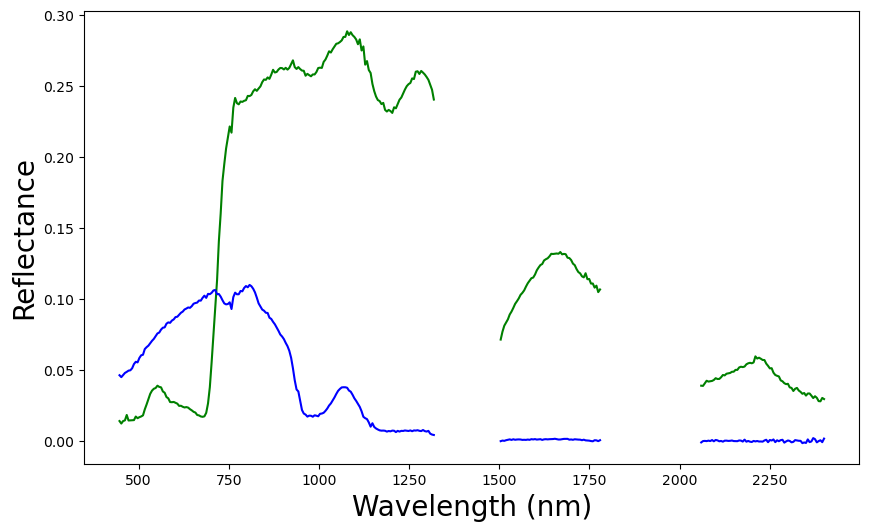

In [11]:
# Re-plot with the bad bands list and wavelengths applied
pixell[bblist == 0] = np.nan    # land pixel
pixelw[bblist == 0] = np.nan    # water pixel

# Compare vegetation and water spectra
plt.plot(wavelengths, pixell, color = 'g')
plt.plot(wavelengths, pixelw, color = 'b')
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

### Reflectance of water, soil, and vegetation in different wavelengths

![title](images/spectral_signatures_landsat_450.jpg)  <h5><center>Reflectance of water, soil, and vegetation in different wavelengths and Landsat TM channels 1 (0.45-0.52 μm), 2 (0.52-0.60 μm), 3 (0.63-0.69 μm), 4 (0.76-0.90 μm), 5 (1.55-1.75 μm) and 7 (2.08-2.35 μm) Source: https://seos-project.eu/classification/classification-c01-p05.html </center></h5>

### Export R,G,B geoTIFF

In [13]:
# Extract RGB bands and save as a 3-band GeoTiff to visualize in QGIS
red = image_open.GetRasterBand(57).ReadAsArray()
green = image_open.GetRasterBand(38).ReadAsArray()
blue = image_open.GetRasterBand(22).ReadAsArray()
print(wavelengths[21])
print(wavelengths[37])
print(wavelengths[56])
print()
#outfile = ('ang20190715t185057_rfl_v2v2_img_RGB.tif')
outfile = ('ang20190716t180912_rfl_v2v2_img_RGB.tif')
rows = image_open.RasterYSize
cols = image_open.RasterXSize
datatype = image_open.GetRasterBand(1).DataType
projection = image_open.GetProjection()
print(projection)
print()
transform = image_open.GetGeoTransform()
print(transform)

driver = gdal.GetDriverByName("GTiff")

DataSetOut = driver.Create(outfile, cols, rows, 3, datatype)
DataSetOut.GetRasterBand(1).WriteArray(blue)
DataSetOut.GetRasterBand(2).WriteArray(green)
DataSetOut.GetRasterBand(3).WriteArray(red)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

482.251821
562.3918209999999
657.561821

PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

(470067.498003, 5.096893217797388, 0.17798743318275492, 6546668.5737, 0.17798743318275492, -5.096893217797388)


## Part 2: Principal Components Analysis

In [14]:
from sklearn.decomposition import PCA

### Create a mask 

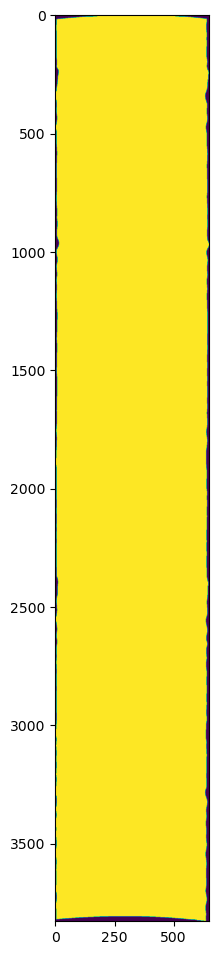

In [17]:
# Open and read the Red band for creating a Mask
image_open = gdal.Open('JPL_files/ang20190716t180912_rfl_v2v2_img')

red = image_open.GetRasterBand(57).ReadAsArray()

mask = np.ones(np.shape(red))
mask[red == -9999] = 0

plt.rcParams['figure.figsize'] = [8,12]
plt.imshow(mask)
plt.show()

#img_red = image_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = image_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = image_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
#plt.rcParams['figure.figsize'] = [2,15]
#plt.rcParams['figure.dpi'] = 100
#plt.imshow(img_red, vmin=0, vmax=0.1)
#plt.imshow(img_green, vmin=0, vmax=0.1)
#plt.imshow(img_blue, vmin=0, vmax=0.1)
#plt.colorbar()
#plt.show()

In [18]:
# # Perform a PCA transformation on the image

# Create a new array based on the number of good bands and pixels in the image
# Load all of the good band data into a new array
pixels = np.count_nonzero(mask)
bands = np.count_nonzero(bblist)
img_vals = np.zeros((bands, pixels)).astype(int)

# Load each band in individually (This may take a minute)
j = 0
for i in range(0, len(bblist)):
    if bblist[i] == 1:
        
        # Reduce the memory needed by loading only masked values in as integers
        img_vals[j] = ((image_open.GetRasterBand(i+1).ReadAsArray()[mask == 1])*100000).astype(int)
        j += 1

In [19]:
# Reorder the axes to feed into the PCA function (samples, components)
# This also may take a minute
img_vals = np.rollaxis(img_vals, 1)
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(img_vals)
img_pca = pca.transform(img_vals)

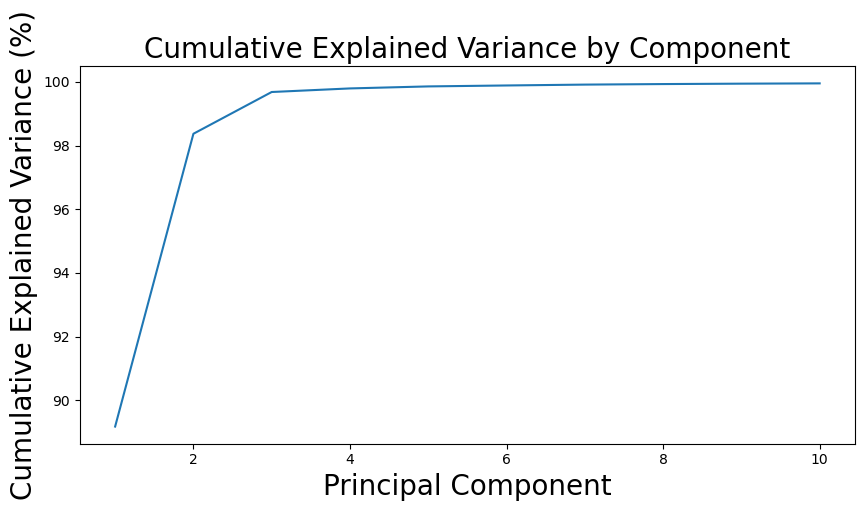

[89.17675746 98.37112398 99.68247768 99.79496474 99.85820939 99.88768807
 99.91499517 99.93182361 99.94451313 99.95333611]


In [20]:
# Map the PCA output back into the 3D array
pca_bands = np.zeros((n_components, rows, cols))
np.shape(img_pca)
pca_bands[:, mask == 1] = np.rollaxis(img_pca, 1)

# Plot the cumulative explained variance by component
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance by Component', fontsize=20)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.plot(range(1, 11), var_cumu)
plt.show()

print(var_cumu)

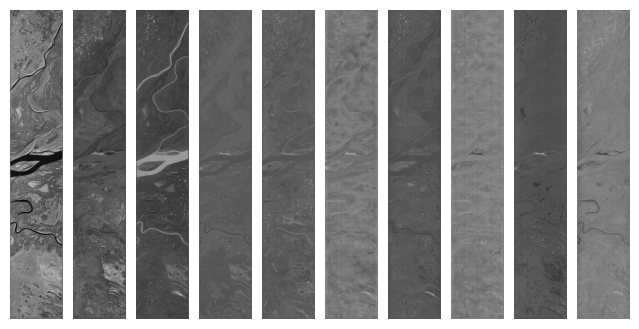

In [21]:
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,10)
# use the created array to output your multiple images
axarr[0].imshow(pca_bands[0], cmap='gray')
axarr[0].axis('off')
axarr[1].imshow(pca_bands[1], cmap='gray')
axarr[1].axis('off')
axarr[2].imshow(pca_bands[2], cmap='gray')
axarr[2].axis('off')
axarr[3].imshow(pca_bands[3], cmap='gray')
axarr[3].axis('off')
axarr[4].imshow(pca_bands[4], cmap='gray')
axarr[4].axis('off')
axarr[5].imshow(pca_bands[5], cmap='gray')
axarr[5].axis('off')
axarr[6].imshow(pca_bands[6], cmap='gray')
axarr[6].axis('off')
axarr[7].imshow(pca_bands[7], cmap='gray')
axarr[7].axis('off')
axarr[8].imshow(pca_bands[8], cmap='gray')
axarr[8].axis('off')
axarr[9].imshow(pca_bands[9], cmap='gray')
axarr[9].axis('off')
plt.show()

In [24]:
# Select the PCA bands that together explain >99.9% of the image's varianc
pca_results = pca_bands[0:6]

# Save the 6-band PCA output
outfile = ('ang20190716t180912_rfl_v2v2_img_PCA.tif')
rows = image_open.RasterYSize
cols = image_open.RasterXSize
datatype = image_open.GetRasterBand(1).DataType
projection = image_open.GetProjection()
transform = image_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 6, datatype)
DataSetOut.GetRasterBand(1).WriteArray(pca_results[0])
DataSetOut.GetRasterBand(2).WriteArray(pca_results[1])
DataSetOut.GetRasterBand(3).WriteArray(pca_results[2])
DataSetOut.GetRasterBand(4).WriteArray(pca_results[3])
DataSetOut.GetRasterBand(5).WriteArray(pca_results[4])
DataSetOut.GetRasterBand(5).WriteArray(pca_results[5])
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None